In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
pd.set_option("display.max_columns", 50)

In [2]:
# Making dataframe from clean data
df = pd.read_csv("../../clean_data/clean_victimization_data.csv")
df.head()

,Year,Weight,Sex,Race,Hispanic origin,Race/Hispanic origin,Age,Marital status,Household income,Population size,Region,Location of residence,Victim-offender relationship,Reporting to the police,Presence of Weapon,Weapon category,Aggregate type of crime,Type of crime,Violent crime excluding simple assault,Injury,Medical treatment for physical injuries,Victim services,Location of incident
0,1995,3463.13071,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Never married,"50,000 to 74,999","250,000 to 499,999",West,Urban,Stranger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Robbery,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
1,1995,2497.65395,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Married,"50,000 to 74,999","Under 100,000",Midwest,Suburban,Stranger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
2,1995,2521.20834,Female,Black,Non-Hispanic,Non-Hispanic black,25 to 34,Never married,"50,000 to 74,999","Under 100,000",Midwest,Suburban,Stranger,"Yes, reported to the police","Yes, offender had weapon",Knife,Violent victimization,Aggravated assault,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"At or near friend, neighbor, or relative's home"
3,1995,2023.97373,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"25,000 to 34,999",Not a place,South,Suburban,Stranger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
4,1995,12143.84238,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"25,000 to 34,999",Not a place,South,Suburban,Stranger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."


In [3]:
# Empty dataframe for the age by Victim-offender relationship to be put in
graph_df = pd.DataFrame()

# For loop running through each unique relationship value and adding it to graph_df
for relationship in df['Victim-offender relationship'].unique():
    print(relationship)
    relationship_df = df[df['Victim-offender relationship'] == f"{relationship}"]
    relationship_series = relationship_df['Age'].value_counts()
    by_relationship = relationship_series.to_frame().reset_index()
    by_relationship.rename(columns={by_relationship.columns[1]:f"{relationship}"}, inplace=True)
    
    if graph_df.empty:
        graph_df = by_relationship
    else:
        graph_df = graph_df.merge(by_relationship, on='index')

graph_df

Stranger
Well-known/casual acquaintances
Intimates
Do not know number of offenders
Other relatives
Do not know relationship


,index,Stranger,Well-known/casual acquaintances,Intimates,Do not know number of offenders,Other relatives,Do not know relationship
0,35 to 49,4753,3075,1688,427,786,481
1,25 to 34,4229,2286,1710,302,444,332
2,50 to 64,2627,1805,477,258,597,308
3,21 to 24,2067,1022,727,149,205,187
4,18 to 20,1730,1256,443,129,183,185
5,15 to 17,1459,1698,162,141,239,198
6,12 to 14,1288,2425,40,144,189,199
7,65 or older,741,462,56,143,174,79


In [4]:
# Sorting rows and columns
graph_df.rename(columns={'index':'Age'}, inplace=True)
graph_df['order'] = [6, 5, 7, 4, 3, 2, 1, 8]
graph_df.sort_values('order', inplace=True)
graph_df.reset_index(inplace=True)
graph_df.drop('index', axis=1, inplace=True)
graph_df.drop('order', axis=1, inplace=True)
graph_df = graph_df[['Age', 'Intimates', 'Other relatives', 'Well-known/casual acquaintances', 'Stranger', 'Do not know relationship', 'Do not know number of offenders']]
graph_df

,Age,Intimates,Other relatives,Well-known/casual acquaintances,Stranger,Do not know relationship,Do not know number of offenders
0,12 to 14,40,189,2425,1288,199,144
1,15 to 17,162,239,1698,1459,198,141
2,18 to 20,443,183,1256,1730,185,129
3,21 to 24,727,205,1022,2067,187,149
4,25 to 34,1710,444,2286,4229,332,302
5,35 to 49,1688,786,3075,4753,481,427
6,50 to 64,477,597,1805,2627,308,258
7,65 or older,56,174,462,741,79,143


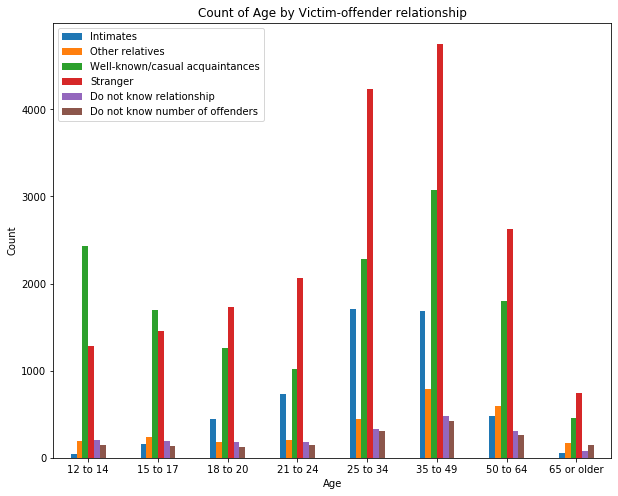

In [8]:
# Making and labeling graph
age_by_relationship = graph_df.plot(kind='bar', figsize=(10,8))
age_by_relationship.set_xticklabels(graph_df['Age'], rotation=0)
age_by_relationship.set_title('Count of Age by Victim-offender relationship')
age_by_relationship.set_xlabel('Age')
age_by_relationship.set_ylabel('Count')
age_by_relationship
plt.savefig('age_by_relationship')
plt.show()